### **Import Libraries**

In [9]:
import pandas as pd # data manipulation
import warnings # ignore warnings messages
import numpy as np # linear algebra

In [2]:
warnings.filterwarnings("ignore")

#### **Nominal Data**

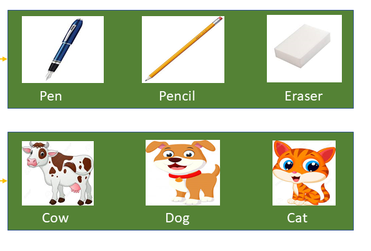

It represents a quality that is not necessarily orderable. For example, the sex of an individual or the species of an animal.

##### **One Hot Encoding**
<img src="https://miro.medium.com/max/1838/1*O_pTwOZZLYZabRjw3Ga21A.png">

This type of processing is only performed for nominal variables. 

Where several dummy variables are created according to the number of categories according to the variable.
Where it meets the condition of the category, it will be assigned a 1. While the other variables will be filled with 0.

There are 2 types of cases to perform this **transformation**:

* Binary transformation. Where there are only 2 possible cases.
* Multinomial transformation. Where there are 3 or more possible states.

#### **Binary Transform**

For the case of a binary transformation. It is recommended to leave only one column. Since it is perfectly understood that where it is assigned, it meets the condition.

In [6]:
df=pd.read_csv("weight-height.csv")

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

##### **Method 1**

In [11]:
df["Gender Numpy"] = np.where(df.Gender == "Male",1,0)

We use the **where** method of the numpy library. Where it receives the **variable** of interest as well as a **logical operator**, in this case it is comparison. Followed by the **criteria** to be met. Finally the **true** and **false** condition.

We create a new variable "Gender Numpy". For cases where the sex belongs to male.It will be assigned a 1 otherwise it will be a 0.

#### **Method 2**

In [13]:
df["Gender Lambda"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

We use the **apply** method. To apply the **lambda** function.

In [15]:
df[["Gender Numpy","Gender Lambda"]].head()

,Gender Numpy,Gender Lambda
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


Both methods give the same result. With the difference of the syntax.

#### **Multinomial Transform**

In [16]:
df=pd.read_csv("IRIS.csv")

In [19]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
df = pd.get_dummies(df,columns = ["species"])

We use the **pd.get_dummies** method to perform the creation of the dummy variables. We pass the dataframe as well as assign the columns that we want to do the transformation to in a list.

In [29]:
df.select_dtypes("uint8").head()

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### **Ordinal Data**

<img src="https://www.voxco.com/wp-content/uploads/2021/03/Cover-scale.jpg">

They are variables that follow a category order. For example, in a customer satisfaction measurement scale, if it is bad, good or outstanding.

In [30]:
df=pd.read_csv("car_evaluation.csv")

In [31]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [32]:
df["safety"].unique()

array(['low', 'med', 'high'], dtype=object)

A clear example of variables of this type is the safety variable. It refers to the customer's degree of satisfaction with the vehicle.

Algorithms work best with numbers. So we have to transform them to a numerical value.

For the low, mid and high categories. We replace them with a **numerical equivalence**. It makes sense to assign the **highest value**. 

#### **Method 1**

In [33]:
df["safety"].replace(to_replace=["low","med","high"],value=[0,1,2],inplace=True)

We use the **replace** method where it receives as parameters a **list** of the categories to replace and the value we want to assign to them. Finally we assign the parameter **inplace** equal to True. What causes that it will not be necessary to create a new variable to save the changes.

In [34]:
df["safety"].unique()

array([0, 1, 2], dtype=int64)

#### **Method 2**

In [35]:
df["buying"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [36]:
ordinal_dict={"low":0,"med":1,"high":2,"vhigh":3}

We create a dictionary where we assign the values according to the category.

In [37]:
df["buying"] = df["buying"].map(ordinal_dict)

We use the **map** method which works similarly to the replace function. With the difference that we only pass a **dictionary** as a parameter.